In [1]:
#花分类 KNN鸢尾花的分类

In [32]:
#加载数据集
from sklearn.datasets import load_iris          # 加载鸢尾花测试集的.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV    # 分割训练集和测试集的
from sklearn.preprocessing import StandardScaler        # 数据标准化的
from sklearn.neighbors import KNeighborsClassifier      # KNN算法 分类对象
from sklearn.metrics import accuracy_score              # 模型评估的, 计算模型预测的准确率

In [6]:
#加载数据集并查看数据集
def dm01():
    iris_data = load_iris()
    #查看数据集
    #print(iris_data)#字典
    #查看字典素有的键
    print(iris_data.keys())
    print(iris_data.target)
dm01()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

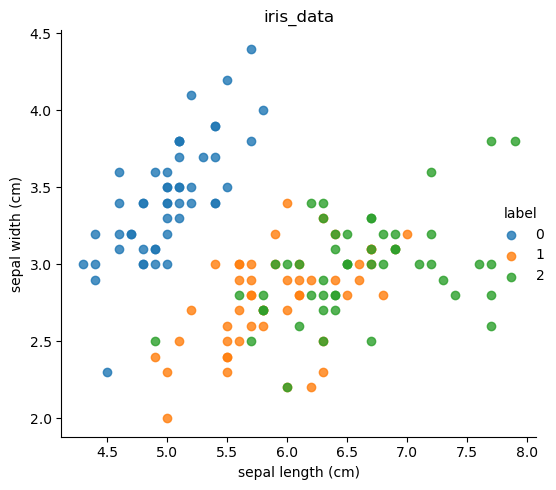

In [13]:
#可视化
def dm02():
    iris_data = load_iris()
    #封装数据集
    iris_df = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)
    iris_df['label'] = iris_data.target
    print(iris_df)
    #绘制点图
    sns.lmplot(data = iris_df,x = 'sepal length (cm)',y = 'sepal width (cm)',hue = 'label',fit_reg = False)#拟合回归线
    plt.title('iris_data')
    plt.tight_layout()#紧密样式
    plt.show()
dm02()

In [19]:
#数据划分
def dm03():
    iris_data = load_iris()
    x_train,x_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size = 0.2,random_state = 23)#随机种子固定可以让数据集划分固定
    #打印切割结果
    #print(len(x_train))
    #print(x_train)
    #print(x_test)
    #print(len(x_test))
dm03()

In [31]:
#实现完整案例
def dm04():
    #加载数据集
    iris_data = load_iris()
    #数据分割 数据预处理
    x_train,x_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size = 0.2,random_state = 26)
    #预处理
    #特征提取  源数据只有四列且均由用  则不提取
    #预处理
    #创建标准化对象
    transfer = StandardScaler()
    #对特征列标准化 fit_transform 一般用于训练姐
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)
    #模型训练
    estimator = KNeighborsClassifier(n_neighbors=3)
    #模型训练
    estimator.fit(x_train,y_train)
    #模型预测
    #对切分的数据集进行测试
    y_pred = estimator.predict(x_test)
    print(y_pred)
    #自定义数据集
    my_data = [[4.7,5.1,1.5,0.5]]
    transfer.transform(my_data)
    my_pred = estimator.predict(my_data)
    print(my_pred)
    #查看每种分类的概率
    my_pred_proba = estimator.predict_proba(my_data)
    print(my_pred_proba)
    #模型评估
    #直接评分  基于训练姐特征和标签 训练集测试集均可 使用测试集
    print(estimator.score(x_test,y_test))
    #基于测试集的标签和预测结果进行评分
    print(accuracy_score(y_test,y_pred))
dm04()

[1 1 0 0 2 1 0 2 2 2 0 1 1 0 1 0 2 1 2 0 0 2 2 2 2 1 1 0 0 2]
[2]
[[0. 0. 1.]]
0.9666666666666667
0.9666666666666667


In [43]:
def dm04():
    #加载数据集
    iris_data = load_iris()
    #数据分割 数据预处理
    x_train,x_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size = 0.2,random_state = 20)
    #预处理
    #特征提取  源数据只有四列且均由用  则不提取
    #预处理
    #创建标准化对象
    transfer = StandardScaler()
    #对特征列标准化 fit_transform 一般用于训练姐
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)
    #模型训练
    estimator = KNeighborsClassifier()
    #模型训练
    estimator.fit(x_train,y_train)
    #超参可能出现的值
    param_dict = {'n_neighbors':[i for i in range(1,11)]}
    #食用网格搜素,找最有超惨 返回为处理后的模型对象
    estimator = GridSearchCV(estimator,param_dict,cv=4)
    estimator.fit(x_train,y_train)
    #打印最有超参组合
    print(estimator.best_score_)
    print(estimator.best_params_)
    print(estimator.best_estimator_)
    print(estimator.cv_results_)
    #模型预测
    estimator = KNeighborsClassifier(n_neighbors=6)
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    #模型评估
    print(accuracy_score(y_test,y_pred))
dm04()

0.9750000000000001
{'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6)
{'mean_fit_time': array([0.00090241, 0.0005458 , 0.00062686, 0.00037599, 0.00095457,
       0.00087667, 0.00045556, 0.0004999 , 0.0004862 , 0.00034678]), 'std_fit_time': array([5.54862094e-04, 5.49635534e-04, 4.15054473e-04, 4.14999778e-04,
       7.82890843e-05, 5.46149863e-04, 4.60005568e-04, 4.99904163e-04,
       4.86619311e-04, 6.00640273e-04]), 'mean_score_time': array([0.00261605, 0.00215191, 0.00184005, 0.00196397, 0.00194937,
       0.00170046, 0.00179362, 0.0020839 , 0.00198829, 0.00219303]), 'std_score_time': array([0.00078266, 0.00011629, 0.00060461, 0.00030082, 0.00026523,
       0.00070544, 0.00076254, 0.00012736, 0.00033321, 0.00020632]), 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=999999), 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_n